<a href="https://colab.research.google.com/github/BOLLOJUAISHWARYA/DeepLearning/blob/main/GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the libraries  
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  

In [2]:
# Importing the training set  
dataset_train = pd.read_csv('/content/drive/MyDrive/Datasets/Google_Stock_Price_Train.csv')  
training_set = dataset_train.iloc[:, 1:2].values  

In [3]:
print(dataset_train.shape,training_set.shape)

(1258, 6) (1258, 1)


In [4]:
# Feature Scaling  
from sklearn.preprocessing import MinMaxScaler  
sc = MinMaxScaler(feature_range = (0, 1))  
training_set_scaled = sc.fit_transform(training_set)  

In [5]:
# Creating a data structure with 10 timesteps and 1 output  
X_train = []  
y_train = []  
for i in range(10, 1258):  
    X_train.append(training_set_scaled[i-10:i, 0])  
    y_train.append(training_set_scaled[i, 0])  
X_train, y_train = np.array(X_train), np.array(y_train)  

In [6]:
# Reshaping  
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  

In [7]:
print(X_train.shape,y_train.shape)

(1248, 10, 1) (1248,)


In [8]:
# Importing the Keras libraries and packages  
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM,GRU
from keras.layers import Dropout  

In [9]:
# Initialising the RNN  
regressor = Sequential()  
# Adding the first GRU layer and some Dropout regularization  
regressor.add(GRU(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))  
regressor.add(Dropout(0.2))  
# Adding a second GRU layer and some Dropout regularization  
regressor.add(GRU(units = 50, return_sequences = True))  
regressor.add(Dropout(0.2))  
# Adding a third GRU layer and some Dropout regularization  
regressor.add(GRU(units = 50, return_sequences = True))  
regressor.add(Dropout(0.2))  
# Adding a fourth GRU layer and some Dropout regularization  
regressor.add(GRU(units = 50))  
regressor.add(Dropout(0.2))  
# Adding the output layer  
regressor.add(Dense(units = 1))  
# Compiling the RNN  
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')  
# Fitting the RNN to the Training set  
history = regressor.fit(X_train, y_train, epochs = 100,validation_split=0.2, batch_size = 32)  

Epoch 1/100
32/32 [==============================] - 23s 177ms/step - loss: 0.0286 - val_loss: 0.0074
Epoch 2/100
32/32 [==============================] - 1s 34ms/step - loss: 0.0045 - val_loss: 0.0022
Epoch 3/100
32/32 [==============================] - 1s 31ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 4/100
32/32 [==============================] - 1s 30ms/step - loss: 0.0039 - val_loss: 0.0012
Epoch 5/100
32/32 [==============================] - 1s 30ms/step - loss: 0.0032 - val_loss: 0.0015
Epoch 6/100
32/32 [==============================] - 1s 30ms/step - loss: 0.0033 - val_loss: 0.0022
Epoch 7/100
32/32 [==============================] - 1s 30ms/step - loss: 0.0029 - val_loss: 0.0012
Epoch 8/100
32/32 [==============================] - 1s 30ms/step - loss: 0.0029 - val_loss: 0.0014
Epoch 9/100
32/32 [==============================] - 1s 31ms/step - loss: 0.0025 - val_loss: 0.0012
Epoch 10/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0025 - val_loss: 0.00

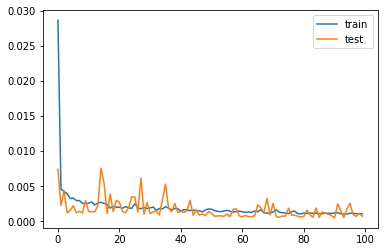

In [10]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [11]:
# Creating a data structure with 30 timesteps and 1 output  
X_train = []  
y_train = []  
for i in range(30, 1258):  
    X_train.append(training_set_scaled[i-30:i, 0])  
    y_train.append(training_set_scaled[i, 0])  
X_train, y_train = np.array(X_train), np.array(y_train)  
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  
# Initialising the RNN  
regressor = Sequential()  
# Adding the first LSTM layer and some Dropout regularization  
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))  
regressor.add(Dropout(0.2))  
# Adding a second LSTM layer and some Dropout regularization  
regressor.add(LSTM(units = 50, return_sequences = True))  
regressor.add(Dropout(0.2))  
# Adding a third LSTM layer and some Dropout regularization  
regressor.add(LSTM(units = 50, return_sequences = True))  
regressor.add(Dropout(0.2))  
# Adding a fourth LSTM layer and some Dropout regularization  
regressor.add(LSTM(units = 50))  
regressor.add(Dropout(0.2))  
# Adding the output layer  
regressor.add(Dense(units = 1))  
# Compiling the RNN  
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')  
# Fitting the RNN to the Training set  
history = regressor.fit(X_train, y_train, epochs = 100,validation_split=0.2, batch_size = 32)  

Epoch 1/100
31/31 [==============================] - 12s 129ms/step - loss: 0.0331 - val_loss: 0.0418
Epoch 2/100
31/31 [==============================] - 2s 73ms/step - loss: 0.0052 - val_loss: 0.0033
Epoch 3/100
31/31 [==============================] - 2s 73ms/step - loss: 0.0044 - val_loss: 0.0028
Epoch 4/100
31/31 [==============================] - 2s 73ms/step - loss: 0.0038 - val_loss: 0.0022
Epoch 5/100
31/31 [==============================] - 2s 72ms/step - loss: 0.0040 - val_loss: 0.0051
Epoch 6/100
31/31 [==============================] - 2s 75ms/step - loss: 0.0038 - val_loss: 0.0042
Epoch 7/100
31/31 [==============================] - 2s 74ms/step - loss: 0.0039 - val_loss: 0.0042
Epoch 8/100
31/31 [==============================] - 2s 74ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 9/100
31/31 [==============================] - 2s 74ms/step - loss: 0.0034 - val_loss: 0.0088
Epoch 10/100
31/31 [==============================] - 2s 73ms/step - loss: 0.0035 - val_loss: 0.00

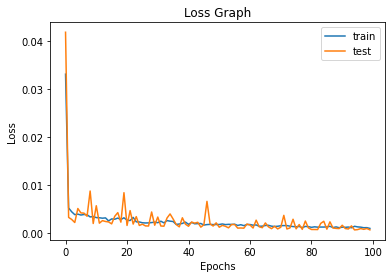

In [12]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Loss Graph') 
plt.xlabel('Epochs')  
plt.ylabel('Loss') 
plt.legend();

In [13]:
# Creating a data structure with 60 timesteps and 1 output  
X_train = []  
y_train = []  
for i in range(60, 1258):  
    X_train.append(training_set_scaled[i-60:i, 0])  
    y_train.append(training_set_scaled[i, 0])  
X_train, y_train = np.array(X_train), np.array(y_train)  
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  
# Initialising the RNN  
regressor = Sequential()  
# Adding the first LSTM layer and some Dropout regularization  
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))  
regressor.add(Dropout(0.2))  
# Adding a second LSTM layer and some Dropout regularization  
regressor.add(LSTM(units = 50, return_sequences = True))  
regressor.add(Dropout(0.2))  
# Adding a third LSTM layer and some Dropout regularization  
regressor.add(LSTM(units = 50, return_sequences = True))  
regressor.add(Dropout(0.2))  
# Adding a fourth LSTM layer and some Dropout regularization  
regressor.add(LSTM(units = 50))  
regressor.add(Dropout(0.2))  
# Adding the output layer  
regressor.add(Dense(units = 1))  
# Compiling the RNN  
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')  
# Fitting the RNN to the Training set  
history = regressor.fit(X_train, y_train, epochs = 100,validation_split=0.2, batch_size = 32)  


Epoch 1/100
30/30 [==============================] - 15s 211ms/step - loss: 0.0321 - val_loss: 0.0288
Epoch 2/100
30/30 [==============================] - 4s 142ms/step - loss: 0.0058 - val_loss: 0.0022
Epoch 3/100
30/30 [==============================] - 4s 139ms/step - loss: 0.0041 - val_loss: 0.0021
Epoch 4/100
30/30 [==============================] - 4s 141ms/step - loss: 0.0042 - val_loss: 0.0044
Epoch 5/100
30/30 [==============================] - 4s 141ms/step - loss: 0.0046 - val_loss: 0.0063
Epoch 6/100
30/30 [==============================] - 4s 142ms/step - loss: 0.0046 - val_loss: 0.0118
Epoch 7/100
30/30 [==============================] - 4s 142ms/step - loss: 0.0037 - val_loss: 0.0019
Epoch 8/100
30/30 [==============================] - 4s 141ms/step - loss: 0.0035 - val_loss: 0.0019
Epoch 9/100
30/30 [==============================] - 4s 138ms/step - loss: 0.0035 - val_loss: 0.0020
Epoch 10/100
30/30 [==============================] - 4s 139ms/step - loss: 0.0030 - val_l

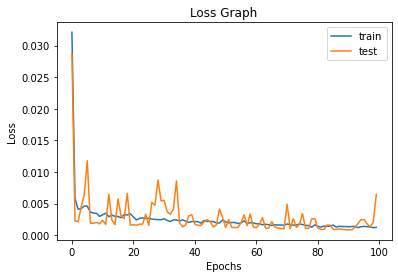

In [14]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Loss Graph') 
plt.xlabel('Epochs')  
plt.ylabel('Loss') 
plt.legend();

In [15]:
# Getting the real stock price of 2017  
dataset_test = pd.read_csv('/content/drive/MyDrive/Datasets/Google_Stock_Price_Test.csv')  
real_stock_price = dataset_test.iloc[:, 1:2].values  

In [16]:
print(dataset_test.shape,real_stock_price.shape)

(20, 6) (20, 1)


In [17]:
# Getting the predicted stock price of 2017  
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)  
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values  
inputs = inputs.reshape(-1,1)  
inputs = sc.transform(inputs)  

In [18]:
X_test = []  
for i in range(60, 80):  
    X_test.append(inputs[i-60:i, 0])  
X_test = np.array(X_test)  
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  
predicted_stock_price = regressor.predict(X_test)  
predicted_stock_price = sc.inverse_transform(predicted_stock_price)  

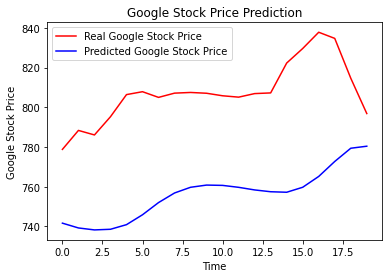

In [19]:
# Visualizing the results  
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')  
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')  
plt.title('Google Stock Price Prediction')  
plt.xlabel('Time')  
plt.ylabel('Google Stock Price')  
plt.legend()  
plt.show()  